In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [12]:
pro_image=[]
f = open("C:\\Users\\hirun\\CSD 3\\output_nwu.txt", "r")
for i in range(16385):
    k=f.readline()
    if(i==0):
        continue
    
    #print(k)
    pro_image.append(int(k,2))

pro_image=np.array(pro_image)
pro_image=pro_image.reshape(128,128)
print(pro_image)


[[170 172 173 ... 169 167 167]
 [171 172 174 ... 169 167 167]
 [171 171 173 ... 169 167 167]
 ...
 [193 190 191 ... 195 196 195]
 [193 190 191 ... 195 196 195]
 [193 190 191 ... 195 196 195]]


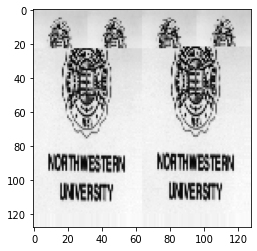

In [13]:
plt.imshow(pro_image,cmap='gray')
plt.savefig('Down_nwu.tif')

In [14]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

[[172 172 171 ... 165 168 171]
 [172 172 171 ... 165 168 171]
 [172 172 171 ... 165 168 171]
 ...
 [193 190 193 ... 196 195 195]
 [193 190 193 ... 196 195 195]
 [193 190 193 ... 196 195 195]]


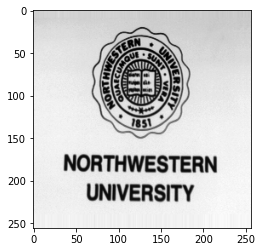

In [15]:
img=cv.imread('nwu.tif',cv.IMREAD_ANYCOLOR)
[width,hight]=img.shape
print(img)
plt.imshow(img,cmap='gray')
plt.show()

In [16]:
mem = img.reshape(-1,1)

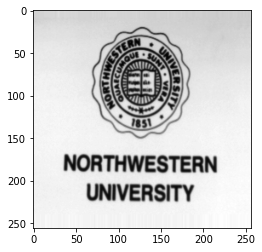

[[172 172 171 ... 165 168 171]
 [172 171 171 ... 166 168 170]
 [171 171 171 ... 166 168 170]
 ...
 [192 190 192 ... 195 194 194]
 [192 190 192 ... 195 194 195]
 [193 190 193 ... 196 195 195]]


In [17]:
AC = 0 # 16 bit
Z  = 1 # 1 bit
R  = 0 # 16 bit - store calculated data for filtering
R0 = 0 # 16 bit - read address for filtering
R1 = 0 # 16 bit - limit of loops for filtering - read address for sampling
R2 = 0 # 16 bit - write address for sampling
R3 = 0 # 16 bit - no of rows in down sampled image
R4 = 0 # 16 bit - filtering address - no of columns in down sampled image
AC,Z = 0,1
R1 = 65022 # (256*(256-2))-2
AC,Z = 0,1
R4 = 257 # first pixel to be filtered
while True:
    #taking values from middle row of the kernal
    R = 0
    R0 = R4
    AC = mem[R0][0]
    R = AC*16
    R0 += 1
    AC = mem[R0][0]
    R += (AC*3)
    R0 -= 2
    AC = mem[R0][0]
    R += (AC*3)
    #taking values from lower row of the kernal
    R0 = R4 + 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    #taking values from upper row of the kernal
    R0 = R4 - 256
    AC = mem[R0][0]
    R += (AC*3)
    R0 += 1
    AC = mem[R0][0]
    R += AC
    R0 -= 2
    AC = mem[R0][0]
    R += AC
    R = R/32
    mem[R4][0] = R
    R4 += 1
    R1 -= 1
    if R1 == 0:
        Z = 0
    if Z == 0:
        break
filtered_image = mem.reshape(256,256)
plt.imshow(filtered_image,cmap='gray')
plt.show()
print(filtered_image)

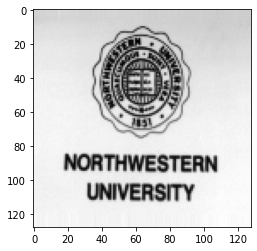

[[172 171 170 ... 169 169 168]
 [171 171 170 ... 168 168 168]
 [171 171 170 ... 168 168 168]
 ...
 [192 192 190 ... 195 193 194]
 [192 192 190 ... 195 193 194]
 [192 192 190 ... 195 193 194]]


In [18]:
R3 = 128
R1 = 0
R2 = 0
while True:
    R4 = 128
    while True:
        AC,Z = 0,1
        AC = mem[R1][0]
        mem[R2][0] = AC
        R2 += 1
        R1 += 2
        R4 -= 1
        if R4 == 0:
            Z = 0
        if Z == 0:
            break
    AC,Z = 0,1
    R1 += 256
    R4 = 128
    R3 -= 1
    if R3 == 0:
        Z = 0
    if Z == 0:
        break
dwn_smpld_image = mem[0:16384].reshape(128,128) #16384 = 128*128
plt.imshow(dwn_smpld_image,cmap='gray')
plt.savefig('Down_Python_nwu.tif')
plt.show()
print(dwn_smpld_image)

In [19]:
mse(pro_image,dwn_smpld_image)

2512.52880859375